In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dict = {
    "x1": [0, 0, 1, 1],
    "x2": [0, 1, 0, 1],
    "y": [-1, 1, 1, 1]
}

In [5]:
data = pd.DataFrame(data = data_dict)

In [6]:
data

,x1,x2,y
0,0,0,-1
1,0,1,1
2,1,0,1
3,1,1,1


In [7]:
X = data[["x1", "x2"]]
y = data["y"]

### Vectorized 

In [8]:
X_matrix = np.column_stack([X, np.ones(len(X))])

In [9]:
X_matrix

array([[0., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

In [10]:
type(X_matrix)

numpy.ndarray

In [11]:
y_vector = np.array(y)

In [12]:
y_vector

array([-1,  1,  1,  1])

$$
\theta = (X^T X)^{-1}X^T y
$$

In [13]:
theta_ols = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_vector

In [14]:
theta_ols

array([ 1. ,  1. , -0.5])

In [24]:
def predict(X, theta_ols):
    y_pred = X @ theta_ols
    
    y_class = np.where(y_pred > 0, 1, -1)
    
    return y_class

In [26]:
y_hat = predict(X_matrix, theta_ols)

In [28]:
y_hat

array([-1,  1,  1,  1])

In [29]:
pd.DataFrame({"actual": y,
              "prediction": y_hat})

,actual,prediction
0,-1,-1
1,1,1
2,1,1
3,1,1


In [36]:
b = theta_ols[2]
w_1 = theta_ols[1]
w_2 = theta_ols[0]

In [37]:
m = -w_1/w_2
c = -b/w_2

In [38]:
m, c

(-1.0000000000000002, 0.5)

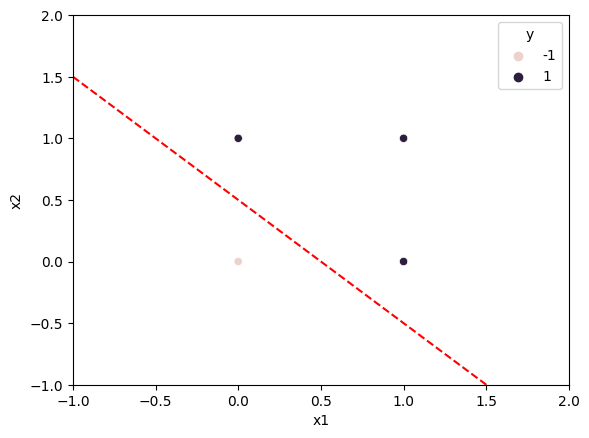

In [39]:
sns.scatterplot(data=data,
                x="x1",
                y="x2",
                hue="y")


x_support = np.linspace(-1, 2, 100)
y_support = m*x_support + c

plt.plot(x_support, y_support, "--r")
plt.xlim(-1, 2)
plt.ylim(-1, 2)


plt.show()